In [127]:
from sklearn.manifold import Isomap,SpectralEmbedding
import os
from pydicom import dcmread
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
#2D model
#input data
data_path = "../data/SCD0000101/CINELAX_302"
all_times = []
all_slices = []
pixel_arrays = []
for dcm_file in os.listdir(data_path):
    dcm = dcmread(os.path.join(data_path, dcm_file))
    pixel_array = dcm.pixel_array
    pixel_array = (pixel_array - np.mean(pixel_array))/np.std(pixel_array)
    pixel_arrays.append(pixel_array)
    time = dcm.TriggerTime
    slice = dcm.SliceLocation
    all_slices.append(slice)
    all_times.append(time)
pixel_arrays = np.array(pixel_arrays)
all_times = np.array(all_times)
all_slices = np.array(all_slices)
indices = np.where(all_slices == np.median(all_slices))[0]
selected_times = all_times[indices]
selected_arrays = pixel_arrays[indices]
#calculate affinity matrix
sigma = 15
w = np.zeros((selected_arrays.shape[0], selected_arrays.shape[0]))
for i in range(selected_arrays.shape[0]):
    for j in range(selected_arrays.shape[0]):
        w[i, j] = np.exp(-np.sum((selected_arrays[i] - selected_arrays[j])**2)/(sigma**2))
#calculate degree matrix
d = np.diag(np.sum(w, axis=1))
#calculate laplacian matrix
l = d - w
#apply isomap
isomap = Isomap(n_components=1,n_neighbors=10)
laplacian_eigenmaps = SpectralEmbedding(n_components=1,affinity='precomputed')
laplacian_embedding = laplacian_eigenmaps.fit_transform(w)
embedding = isomap.fit_transform(w)
#apply learning (isomap, laplacian eigenmaps, etc.)

#sort images

Correlation Laplacian Eigenmaps:  -0.652673293894804


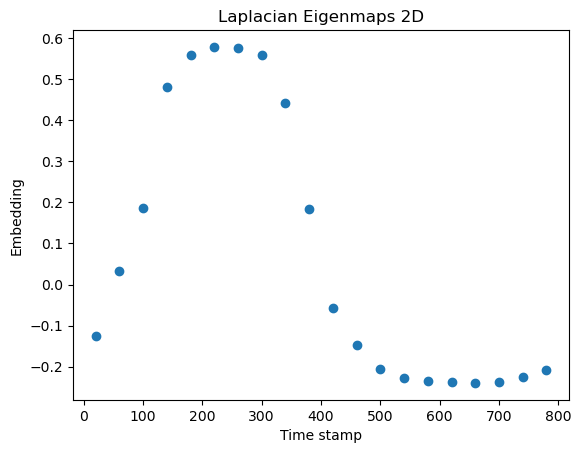

Correlation Isomap:  0.5174764619010459


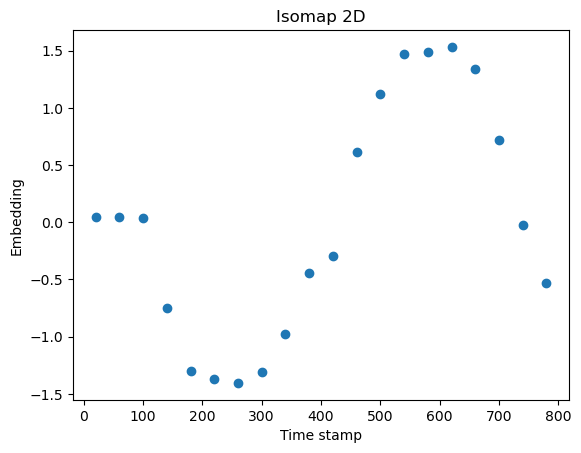

In [133]:
corr_laplacian = np.corrcoef(laplacian_embedding.ravel(), selected_times)[0, 1]
corr_isomap = np.corrcoef(embedding.ravel(), selected_times)[0, 1]
print("Correlation Laplacian Eigenmaps: ", corr_laplacian)
plt.scatter(selected_times, laplacian_embedding.ravel())
plt.title("Laplacian Eigenmaps 2D")
plt.ylabel("Embedding")
plt.xlabel("Time stamp")
plt.show()
print("Correlation Isomap: ", corr_isomap)
plt.scatter(selected_times, embedding.ravel())
plt.title("Isomap 2D")
plt.ylabel("Embedding")
plt.xlabel("Time stamp")
plt.show()

In [134]:
#3D model
#input data
data_path = "../data/SCD0000101/CINELAX_301"
all_times = dict()
all_slices = []
pixel_arrays = dict()
for dcm_file in os.listdir(data_path):
    dcm = dcmread(os.path.join(data_path, dcm_file))
    pixel_array = dcm.pixel_array
    pixel_array = (pixel_array - np.mean(pixel_array))/np.std(pixel_array)
    time = dcm.TriggerTime
    slice = dcm.SliceLocation
    if slice not in pixel_arrays.keys():
        pixel_arrays[slice] = []
        all_times[slice] = []
    pixel_arrays[slice].append(pixel_array)
    all_times[slice].append(time)
for slice in pixel_arrays.keys():
    pixel_arrays[slice] = np.array(pixel_arrays[slice])
    all_times[slice] = np.array(all_times[slice])
    indices = np.argsort(all_times[slice])
    pixel_arrays[slice] = pixel_arrays[slice][indices]
    all_times[slice] = all_times[slice][indices]
    num_times = len((all_times[slice]))

volume_array = []
for i in range(num_times):
    curr_slice = []
    for slice in pixel_arrays.keys():
        curr_slice.append(pixel_arrays[slice][i])
    curr_slice = np.array(curr_slice)
    volume_array.append(curr_slice)
volume_array = np.array(volume_array)

#calculate affinity matrix
sigma = 15
w = np.zeros((volume_array.shape[0], volume_array.shape[0]))
for i in range(volume_array.shape[0]):
    for j in range(volume_array.shape[0]):
        w[i, j] = np.exp(-np.sum((volume_array[i] - volume_array[j])**2)/(sigma**2))
#calculate degree matrix
d = np.diag(np.sum(w, axis=1))
#calculate laplacian matrix
l = d - w
#apply isomap
isomap = Isomap(n_components=1,n_neighbors=10)
laplacian_eigenmaps = SpectralEmbedding(n_components=1,affinity='precomputed')
laplacian_embedding = laplacian_eigenmaps.fit_transform(w)
embedding = isomap.fit_transform(w)
#apply learning (isomap, laplacian eigenmaps, etc.)

Correlation Laplacian Eigenmaps:  -0.5287334909239794


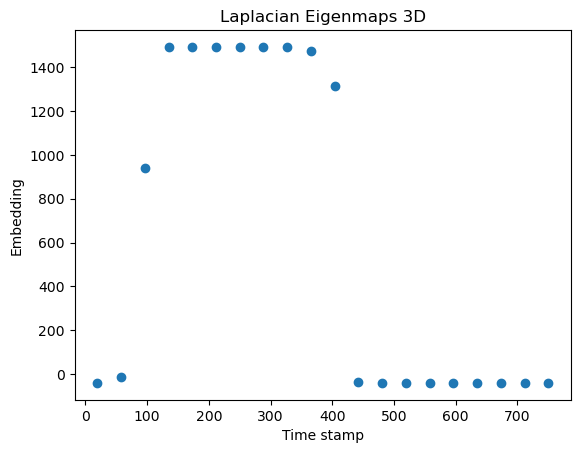

Correlation Isomap:  0.5391892395644812


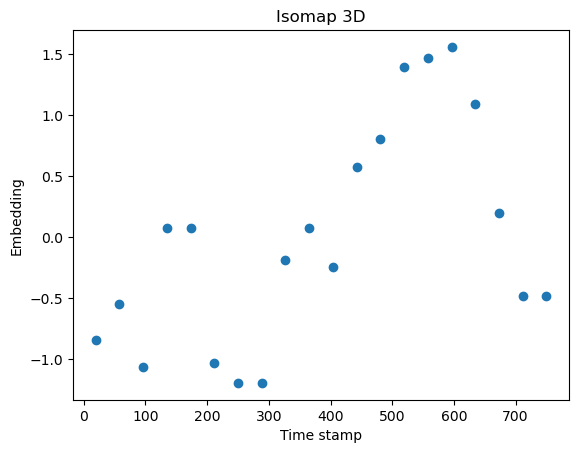

In [135]:
for slice in all_times.keys():
    times = all_times[slice]
    break
corr_laplacian = np.corrcoef(laplacian_embedding.ravel(), times)[0, 1]
corr_isomap = np.corrcoef(embedding.ravel(), times)[0, 1]
print("Correlation Laplacian Eigenmaps: ", corr_laplacian)
plt.scatter(times, laplacian_embedding.ravel())
plt.title("Laplacian Eigenmaps 3D")
plt.ylabel("Embedding")
plt.xlabel("Time stamp")
plt.show()
print("Correlation Isomap: ", corr_isomap)
plt.scatter(times, embedding.ravel())
plt.title("Isomap 3D")
plt.ylabel("Embedding")
plt.xlabel("Time stamp")
plt.show()

In [ ]:
#contour model model development from here down - not functional
#input data
data_path = "../data/SCD_ManualContours/SC-HF-I-01/contours-manual/IRCCI-expert"
all_times = []
all_slices = []
pixel_arrays = []
for dcm_file in os.listdir(data_path):
    dcm = dcmread(os.path.join(data_path, dcm_file))
    pixel_array = dcm.pixel_array
    pixel_array = (pixel_array - np.mean(pixel_array))/np.std(pixel_array)
    pixel_arrays.append(pixel_array)
    time = dcm.TriggerTime
    slice = dcm.SliceLocation
    all_slices.append(slice)
    all_times.append(time)
pixel_arrays = np.array(pixel_arrays)
all_times = np.array(all_times)
all_slices = np.array(all_slices)
indices = np.where(all_slices == np.median(all_slices))[0]
selected_times = all_times[indices]
selected_arrays = pixel_arrays[indices]
#calculate affinity matrix
sigma = 15
w = np.zeros((selected_arrays.shape[0], selected_arrays.shape[0]))
for i in range(selected_arrays.shape[0]):
    for j in range(selected_arrays.shape[0]):
        w[i, j] = np.exp(-np.sum((selected_arrays[i] - selected_arrays[j])**2)/(sigma**2))
#calculate degree matrix
d = np.diag(np.sum(w, axis=1))
#calculate laplacian matrix
l = d - w
#apply isomap
isomap = Isomap(n_components=1,n_neighbors=10)
laplacian_eigenmaps = SpectralEmbedding(n_components=1,affinity='precomputed')
laplacian_embedding = laplacian_eigenmaps.fit_transform(w)
embedding = isomap.fit_transform(w)
#apply learning (isomap, laplacian eigenmaps, etc.)

#sort images

#visualize results
#TODO:
# other data type
# 3D volume

InvalidDicomError: File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.

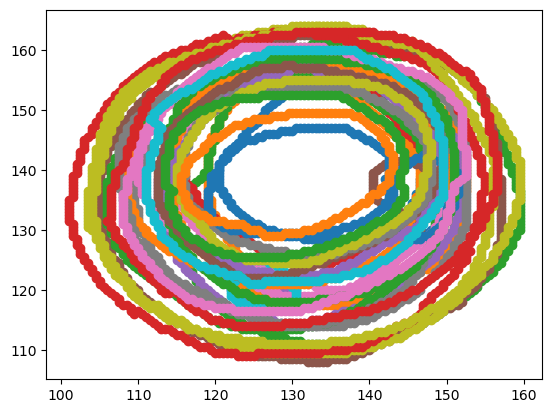

In [123]:
data_path = "../data/SCD_ManualContours/SC-HF-I-01/contours-manual/IRCCI-expert"
for contour_file in os.listdir(data_path):
    contour = pd.read_csv(os.path.join(data_path, contour_file), sep=' ',header=None)
    plt.scatter(contour[0], contour[1])
plt.show()

In [137]:
source_dcms = "../data/SCD0000101/unnamed_2"
for dcm_file in os.listdir(source_dcms):
    dcm = dcmread(os.path.join(source_dcms, dcm_file))
    pixel_array = dcm.pixel_array
    time = dcm.SliceLocation
    print(time)
    print(dcm_file)
    # plt.imshow(pixel_array, cmap='gray')
    # plt.show()

188.2926788
IM-0001-0001.dcm
173.2926788
IM-0001-0002.dcm
158.2926788
IM-0001-0003.dcm
143.2926788
IM-0001-0004.dcm
128.2926788
IM-0001-0005.dcm
113.2926788
IM-0001-0006.dcm
98.29267883
IM-0001-0007.dcm
83.29267883
IM-0001-0008.dcm
68.29267883
IM-0001-0009.dcm
53.29267883
IM-0001-0010.dcm
38.29267883
IM-0001-0011.dcm
23.29267883
IM-0001-0012.dcm
8.292678833
IM-0001-0013.dcm
-6.707321167
IM-0001-0014.dcm
-21.70732117
IM-0001-0015.dcm
-36.70732117
IM-0001-0016.dcm
-51.70732117
IM-0001-0017.dcm
-66.70732117
IM-0001-0018.dcm
-81.70732117
IM-0001-0019.dcm
-96.70732117
IM-0001-0020.dcm
-111.7073212
IM-0001-0021.dcm
-126.7073212
IM-0001-0022.dcm
-141.7073212
IM-0001-0023.dcm
-156.7073212
IM-0001-0024.dcm
-171.7073212
IM-0001-0025.dcm
-186.7073212
IM-0001-0026.dcm
-201.7073212
IM-0001-0027.dcm
-216.7073212
IM-0001-0028.dcm
-231.7073212
IM-0001-0029.dcm
188.2926788
IM-0001-0030.dcm
173.2926788
IM-0001-0031.dcm
158.2926788
IM-0001-0032.dcm
143.2926788
IM-0001-0033.dcm
128.2926788
IM-0001-0034.dc

In [99]:
all_times = np.array(all_times)
sorted_times = np.argsort(all_times)
all_times = all_times[sorted_times]
pixel_arrays = pixel_arrays[sorted_times]
all_slices = np.array(all_slices)
all_slices = all_slices[sorted_times]

In [ ]:
indices = np.where(all_slices == np.median(all_slices))[0]
selected_times = all_times[indices]
selected_arrays = pixel_arrays[indices]